In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

df = pd.read_csv(
    filepath_or_buffer='C:\Users\Catherine McSorley\Desktop\Geog 675 Final Project\WorldBankWorldMigrationMatrix.csv', 
    header=None, 
    sep=',')

columns = [""]*df.shape[1]
for i in range(0,df.shape[1]-1):
    columns[i] = str(df.iloc[1,i])
df.columns=columns
df.head()

,Destination country (across) - Source country (down),Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,Other North,Other South,World,
0,Bilateral Estimates of Migrant Stocks in 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Destination country (across) ...,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,Other North,Other South,World,NaN
2,Afghanistan,0,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,"5,055,219",NaN
3,Albania,0,0,0,0,0,0,0,77,0,...,102,0,0,0,0,0,0,0,"1,194,524",NaN
4,Algeria,0,0,0,0,0,0,0,210,0,...,0,0,0,0,0,0,346,75,"1,833,302",NaN


In [7]:
data = df.iloc[2:219, 1:218]
data.index = columns[1:len(columns)-1]
dataFloat = data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
data1 = dataFloat.iloc[0:214, 0:214]
data2 = data1.fillna(0)
data2


,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Afghanistan,0,0,0,0,0,0,0,9,0,0,...,0,433,1,14,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,77,0,4,...,0,0,0,19,102,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,210,0,3,...,21,0,4,96,0,0,0,0,0,0
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,47,0,0,...,11,0,0,5,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,81,0,0,...,13,0,0,190,441,0,0,0,44339,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,5,...,0,0,0,2,1053,5251,0,0,0,0
Argentina,0,0,0,0,708,0,0,0,0,71,...,27933,0,2,10098,115,0,0,0,0,0
Armenia,0,0,0,0,0,0,0,939,0,0,...,60,16867,0,34,0,0,0,0,0,0
Aruba,0,0,0,0,0,0,5,1,0,0,...,2,0,0,493,0,579,0,0,0,0


In [158]:
dataEurope = data2.loc[['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'Macedonia, FYR', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'],['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'Macedonia, FYR', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']]

corr = dataEurope.corr()
corr1 = corr.fillna(0)
corr.style.background_gradient(cmap='coolwarm')

In [159]:
eig_vals, eig_vecs = np.linalg.eig(corr1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.03929577 -0.09622734  0.31778452 ..., -0.25107638 -0.0892592
  -0.0885214 ]
 [-0.01553241 -0.03578673 -0.08215521 ...,  0.0648957   0.13423155
  -0.03589986]
 [-0.15124234 -0.22308531  0.24140769 ...,  0.14269317  0.15283397
  -0.01166746]
 ..., 
 [-0.06199446 -0.06494695  0.01405844 ..., -0.00667975  0.05966635
  -0.02748564]
 [-0.21626616  0.27011813  0.1282379  ..., -0.10870872  0.16916251
   0.58450373]
 [-0.18362411 -0.21140557 -0.09804773 ...,  0.02532917  0.00960638
  -0.02339784]]

Eigenvalues 
[  7.15651481e+00   5.57772349e+00   4.58532678e+00   3.40502259e+00
   3.23601458e+00   2.48066455e+00   2.31487722e+00   1.76581889e+00
   1.49307951e+00   1.33753343e+00   1.25411845e+00   1.06936403e+00
   1.03454247e+00   9.69868275e-01   9.25410721e-01   8.91398361e-01
   7.26923608e-01   6.17052835e-01   6.02872042e-01   4.06675991e-01
   2.52639567e-01   2.40358581e-01   1.91216691e-01   1.52869701e-01
   8.15346851e-02   5.96937266e-02   4.75018723e-02   3.885

In [160]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

corr1 = corr.fillna(0)

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
7.15651481358
5.57772348626
4.58532678478
3.40502258704
3.23601458232
2.48066454968
2.31487722427
1.76581888971
1.49307951061
1.33753342882
1.25411845446
1.06936403473
1.03454246896
0.969868274606
0.925410721148
0.891398361175
0.726923608438
0.61705283455
0.602872042139
0.406675991475
0.25263956721
0.240358580716
0.191216691249
0.152869700732
0.0815346851264
0.0596937266129
0.0475018723092
0.0388509908887
0.0265655188156
0.0198406368635
0.012892829542
0.00968309510745
0.00659957916399
0.00453927225013
0.00203941090304
0.00168677661141
0.000443935446208
0.000160943113302
4.41636774999e-05
3.39811244204e-05
1.07603879518e-06
3.17757840392e-07
7.79779966052e-17


In [176]:
for i in range(len(eig_vals)):
    eig_vals[i] = np.abs(eig_pairs[i][0])
    
tot = sum(abs(eig_vals))
var_exp = [(np.abs(i) / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 16.64305771,  29.61450767,  40.27805834,  48.19671552,
        55.72233082,  61.49131815,  66.87475355,  70.98130911,
        74.45358704,  77.5641299 ,  80.48068445,  82.96757755,
        85.37349027,  87.62899788,  89.78111584,  91.85413528,
        93.5446553 ,  94.9796619 ,  96.3816899 ,  97.32744802,
        97.9149819 ,  98.47395534,  98.91864532,  99.27415625,
        99.4637718 ,  99.60259442,  99.71306389,  99.80341503,
        99.86519531,  99.91133632,  99.94131965,  99.96383847,
        99.97918633,  99.98974278,  99.9944856 ,  99.99840833,
        99.99944074,  99.99981503,  99.99991773,  99.99999676,
        99.99999926, 100.        , 100.        ])

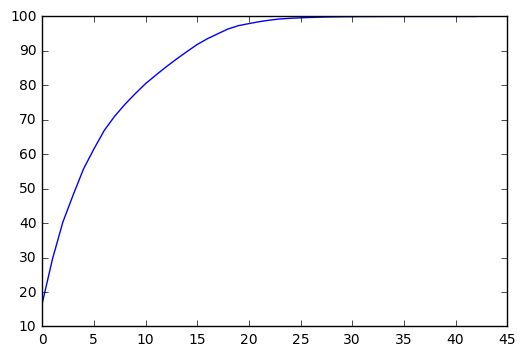

In [162]:
plt.plot(cum_var_exp)
plt.show()

In [164]:
import math

loadings = []
for i in eig_pairs:
    loadings.append(i[1])

loadings = np.array(loadings)
    
for i in range(len(eig_vals)):
    loadings[i] = math.sqrt(eig_vals[i])*loadings[i]
    
loadings[0:7] 
    

array([[ 0.10512272, -0.04155177, -0.40459841, -0.61165109, -0.5262352 ,
         0.19338806, -0.78987499,  0.10101124, -0.43704161, -0.17489985,
        -0.65330542, -0.61417005, -0.18618784, -0.6921373 , -0.13316202,
        -0.38947166, -0.38052797, -0.4192122 , -0.40206204, -0.58844604,
         0.01379459, -0.54530707, -0.05785313, -0.37270455, -0.25317358,
         0.1640118 , -0.65588482,  0.05782804, -0.49515889, -0.44694864,
        -0.54721323, -0.34726415, -0.2590956 , -0.19201903,  0.1667738 ,
        -0.04971768,  0.09960484, -0.56096701, -0.29975928, -0.37242035,
        -0.1658455 , -0.57854794, -0.49122505],
       [-0.22726208, -0.08451826, -0.52686514,  0.69434143, -0.54387235,
        -0.08689691,  0.41051286, -0.2753951 ,  0.08793643,  0.1629845 ,
        -0.57270856,  0.6898996 ,  0.09035387, -0.21655918, -0.05341517,
        -0.19257087, -0.42144698, -0.25653431, -0.18893831,  0.7239186 ,
        -0.06036036,  0.69514071, -0.19558901, -0.12628251, -0.3068253 ,
   

In [165]:
#function for varimax rotation
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

In [166]:
rotated = varimax(loadings[0:7])
rotated

array([[  7.41448826e-17,   3.99644793e-16,  -6.48316883e-16,
          3.93138309e-16,  -7.25599922e-16,   3.30228102e-16,
         -2.67516632e+00,  -2.49873260e-17,  -1.07220125e-16,
          7.10859474e-17,  -2.53871721e-16,   2.48861072e-16,
          5.13017248e-17,   1.90850456e-16,  -9.44833609e-12,
          4.35570898e-17,   5.39853539e-11,  -6.05799537e-17,
         -6.34585523e-11,  -3.52571493e-09,  -3.85635535e-16,
          7.18302694e-17,   2.47747692e-16,  -9.91646624e-12,
          2.31137580e-16,   4.95365671e-17,  -1.26270511e-16,
          2.16581287e-17,   1.30557135e-16,  -1.45483516e-16,
          7.65234855e-17,   1.23323167e-17,  -1.24932312e-16,
          1.22593107e-17,   2.22755933e-17,  -3.51696243e-17,
         -2.89755614e-10,  -7.86909745e-17,  -2.88558074e-16,
          6.06115508e-17,  -1.54977529e-16,   9.16180502e-17,
          4.59154270e-18],
       [ -4.09351152e-17,   2.47054431e-16,   1.05259009e-16,
          3.09857147e-16,   1.47512130e-16,

In [167]:
scores = loadings[0:7]
n = len(dataEurope)
for i in range(7):
    for j in range(n):
        scores[i][j] = np.dot(dataEurope.iloc[j], rotated[i])
scores

array([[ -4.56383377e+03,  -2.67516632e+00,  -2.08930490e+03,
         -2.84637713e+03,  -4.27224061e+03,  -4.46752810e+02,
         -5.40227596e-06,  -3.66497805e+02,  -2.87312862e+03,
         -4.35249560e+03,  -5.99237255e+02,  -2.99618638e+02,
         -4.60128607e+02,  -1.54169835e+04,  -3.12673439e+04,
         -1.47134148e+03,  -4.33376943e+02,  -9.38983380e+02,
         -9.58244574e+03,  -6.39364750e+02,  -8.02549896e+00,
         -5.51084318e+02,  -1.95287141e+02,  -2.19363638e+02,
         -3.21019961e+01,  -1.09681820e+02,  -3.11121843e+03,
         -1.01041032e+04,  -7.08919075e+02,  -6.11543021e+03,
         -1.11821952e+03,  -2.28031177e+04,  -8.27963979e+04,
         -1.60509980e+01,  -1.12089469e+04,  -1.26535367e+03,
         -3.12994459e+02,  -1.72280711e+04,  -9.22932380e+02,
         -1.16904769e+03,  -2.63958660e+04,  -2.57859282e+04,
         -2.14682097e+04],
       [  9.44693442e+00,   3.33719823e-09,   2.14916572e+02,
          1.11468482e+05,   2.55065811e+02,

In [171]:
factors = pd.DataFrame(abs(rotated))
factors.columns = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'Macedonia, FYR', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']
factors.style.highlight_max(axis=1)

,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,Germany,Greece,Hungary,Iceland,Ireland,Italy,Latvia,Liechtenstein,Lithuania,Luxembourg,Malta,Monaco,Montenegro,Netherlands,"Macedonia, FYR",Norway,Poland,Portugal,Romania,Russian Federation,San Marino,Serbia,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,7.41449e-17,3.99645e-16,6.48317e-16,3.93138e-16,7.256e-16,3.30228e-16,2.67517,2.49873e-17,1.0722e-16,7.10859e-17,2.53872e-16,2.48861e-16,5.13017e-17,1.9085e-16,9.44834e-12,4.35571e-17,5.39854e-11,6.058e-17,6.34586e-11,3.52571e-09,3.85636e-16,7.18303e-17,2.47748e-16,9.91647e-12,2.31138e-16,4.95366e-17,1.26271e-16,2.16581e-17,1.30557e-16,1.45484e-16,7.65235e-17,1.23323e-17,1.24932e-16,1.22593e-17,2.22756e-17,3.51696e-17,2.89756e-10,7.8691e-17,2.88558e-16,6.06116e-17,1.54978e-16,9.16181e-17,4.59154e-18
1,4.09351e-17,2.47054e-16,1.05259e-16,3.09857e-16,1.47512e-16,2.3217e-16,3.11261e-09,1.25937e-16,1.61547e-16,6.81477e-17,1.32489e-16,2.01902e-16,1.47075e-16,1.48803e-16,6.71648e-12,1.53208e-16,3.49409e-10,6.72939e-17,1.34881e-10,2.36172,6.50681e-18,1.71443e-16,1.95616e-16,8.78113e-11,9.0824e-17,1.39396e-16,1.50661e-17,2.34494e-16,1.35295e-17,2.11888e-16,3.12394e-17,1.34619e-16,1.42267e-16,6.50662e-17,6.40203e-17,7.4219e-17,1.24596e-09,9.72309e-17,6.04343e-17,3.67232e-17,5.97885e-17,1.91225e-17,1.37702e-16
2,1.28134e-16,7.61617e-17,3.86081e-16,2.42884e-17,4.00961e-17,3.00182e-17,2.31932e-10,6.62195e-17,1.9217e-17,7.15107e-17,3.91533e-16,2.02431e-16,2.53003e-16,2.35425e-17,1.8528e-09,1.71487e-16,4.31649e-10,2.94184e-18,5.14655e-11,1.12969e-09,3.92003e-17,9.47308e-17,1.48384e-16,5.82446e-10,9.84171e-17,3.70229e-17,7.68637e-17,2.4834e-16,5.91937e-17,4.38052e-18,1.88524e-16,5.86924e-17,6.17136e-19,1.76688e-16,1.09443e-18,6.34322e-17,2.14134,4.96214e-17,1.05967e-16,1.1789e-16,2.35919e-17,3.28162e-17,7.0217e-17
3,1.52517e-16,2.54343e-16,9.93186e-16,6.14068e-16,2.49837e-16,3.42776e-18,3.72377e-11,1.20178e-16,4.88966e-17,2.14538e-17,1.59233e-16,1.25598e-16,1.3328e-16,1.96211e-16,1.39939e-10,2.65513e-16,1.84527,8.44712e-17,4.83702e-10,2.73003e-10,1.12662e-16,1.58514e-16,3.02535e-17,1.88359e-09,1.86036e-16,2.60937e-16,2.92212e-17,1.78705e-16,6.55927e-17,1.2266e-16,3.16342e-18,6.12087e-17,2.10017e-17,9.42387e-17,2.7399e-17,6.21152e-17,3.71969e-10,1.14808e-16,3.76143e-16,2.45588e-16,9.17454e-17,6.80101e-17,2.59317e-17
4,1.57518e-16,1.06515e-16,5.97e-16,4.8642e-16,4.15823e-16,3.44306e-16,4.26717e-11,4.92172e-17,6.81484e-17,3.59018e-16,1.90404e-16,2.60205e-17,1.20813e-16,9.48929e-18,4.90737e-11,1.15229e-17,4.71549e-10,5.19303e-17,1.79889,1.02737e-10,7.6939e-17,2.90643e-17,4.98628e-17,6.95215e-10,5.06038e-16,1.60575e-17,6.40113e-17,7.01931e-17,3.17518e-16,1.2369e-16,1.83941e-17,7.41653e-17,5.51502e-17,3.02294e-16,1.05347e-16,2.86636e-17,4.32358e-11,3.32043e-17,7.81721e-17,3.53916e-17,7.30792e-17,4.83345e-17,1.91201e-18
5,1.08368e-16,6.03751e-16,2.29485e-15,7.33731e-16,2.27038e-16,1.34736e-16,5.8383e-12,3.97501e-16,7.18049e-17,2.43422e-17,4.36423e-16,5.15648e-16,1.76899e-16,2.24046e-16,5.15805e-10,2.53814e-16,1.60772e-09,2.10093e-16,6.08691e-10,5.85599e-11,1.15072e-17,1.02542e-17,6.71224e-17,1.57501,4.54857e-17,9.21274e-17,5.86297e-17,3.63878e-18,5.23055e-17,3.05081e-16,7.00665e-17,5.8262e-16,6.91435e-17,9.01528e-17,1.68576e-16,1.20761e-16,4.28405e-10,9.94316e-18,4.00373e-16,4.33579e-16,2.51015e-16,1.3188e-16,7.73189e-17
6,1.85268e-15,1.64799e-16,4.82253e-16,1.38778e-16,3.46945e-16,1.94289e-16,5.37377e-12,1.68268e-16,3.31766e-17,1.76942e-16,1.07553e-16,9.71445e-17,9.54098e-18,6.41848e-17,1.52147,1.43115e-16,1.15383e-10,3.98986e-17,4.15069e-11,4.32756e-12,1.63064e-16,1.249e-16,1.04083e-17,4.98274e-10,3.98986e-17,9.02056e-17,1.2837e-16,2.68882e-17,3.46945e-17,6.245e-17,3.27971e-17,7.63278e-17,8.1532e-17,1.11022e-16,5.20417e-17,4.85723e-17,1.31646e-09,9.71445e-17,4.51028e-17,3.1225e-17,8.50015e-17,1.21431e-16,1.07553e-16


In [174]:
scoresdf = pd.DataFrame(abs(scores))
scoresdf.columns = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'Macedonia, FYR', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']
scoresdf.style.background_gradient(cmap='coolwarm', axis = 1)

,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,Germany,Greece,Hungary,Iceland,Ireland,Italy,Latvia,Liechtenstein,Lithuania,Luxembourg,Malta,Monaco,Montenegro,Netherlands,"Macedonia, FYR",Norway,Poland,Portugal,Romania,Russian Federation,San Marino,Serbia,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,4563.83,2.67517,2089.3,2846.38,4272.24,446.753,5.40228e-06,366.498,2873.13,4352.5,599.237,299.619,460.129,15417,31267.3,1471.34,433.377,938.983,9582.45,639.365,8.0255,551.084,195.287,219.364,32.102,109.682,3111.22,10104.1,708.919,6115.43,1118.22,22803.1,82796.4,16.051,11208.9,1265.35,312.994,17228.1,922.932,1169.05,26395.9,25785.9,21468.2
1,9.44693,3.3372e-09,214.917,111468,255.066,9.44703,318.832,11.8087,113.363,318.832,488.876,7130.03,321.194,4959.61,106.277,451.089,73.2133,1941.33,571.536,4.86491e-07,4.02139e-08,38011.9,16.532,11.8086,2.10824e-08,5.62494e-06,323.556,2.15855e-05,734.495,1903.55,87.3837,165.321,311284,2.41976e-07,25.979,56.6813,16.532,373.152,540.834,172.406,212.555,80218.2,6022.39
2,301.928,2.73271e-08,19389.8,400.43,2068.53,254003,3704.51,132011,59.9574,1389.73,256.961,85.6535,226.982,47060.2,353.321,1552.47,27.8374,207.71,20280.6,132.763,57.8161,169.166,413.278,42.8268,6.42397,9338.37,1854.4,40839.6,132.763,1353.33,349.038,1295.51,6344.78,2.14134,69505.7,1693.8,1.14648e-06,1126.34,2083.52,8558.93,471.094,5109.23,2496.8
3,107.025,3.69054,247.266,83.0372,245.421,297.089,536.974,332.149,9.22635,586.796,6065.4,249.111,341.375,3142.5,99.6446,477.925,7.00902e-08,202.98,568.343,1485.44,1.84527,3009.64,267.564,11.0716,1.84527,18.4527,564.653,83.0371,1948.61,22189.4,1173.59,963.231,4.88335e-06,1.84527,570.189,485.306,70.1203,1164.37,3620.42,319.232,143.931,559.117,2627.66
4,808895,95.3413,27985.4,55209.8,81754.3,21631.7,106394,42756.1,1019.97,18222.8,5571.17,2638.98,4855.21,380683,29469.5,23151.7,339.991,6357.29,6.79112e-07,6073.06,217.666,10487.5,8366.65,3335.15,2867.43,4347.92,22819,128151,3047.32,205845,11342,1.8423e+06,140997,3464.67,79629.8,19438.8,8235.33,57480,10813.1,346814,35693.6,416681,112499
5,166.951,1.57501,217.352,55.1255,327.603,321.303,1782.91,192.152,86.6257,159.076,258.302,7.87506,154.351,1938.84,151.201,283.502,7.87506,537.079,3080.72,151.201,5.58173e-08,86.6257,3.15003,1.06414e-06,12.6001,6.8882e-07,837.907,154.351,129.151,489.829,111.826,1335.61,1871.11,1.1682e-06,1086.76,200.027,70.8756,296.102,916.657,203.177,452.029,567.005,20361.8
6,653363,19.7791,3365.5,2175.71,7654.53,1341.94,108893,701.399,32278,6616.88,1344.98,191.705,1151.75,170816,4.71387e-07,2580.42,80.638,880.932,9414.87,524.908,13.6932,813.988,1090.9,133.89,36393.6,812.466,5682.7,5157.79,771.386,23400.2,485.35,69006.4,80956,6.08589,12727.1,1288.69,727.264,1763.39,8094.23,5522.94,50027.5,29066.2,26409.7
